## Image Classification - Keras, Dataset - MNIST
### author:ruthvicp
### date : March 22, 2019


Given below is the code for image classification built on MNIST dataset. The image dimensions are 28*28. 

In [1]:
# Load all the necessary modules
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

C:\Users\ruthv\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


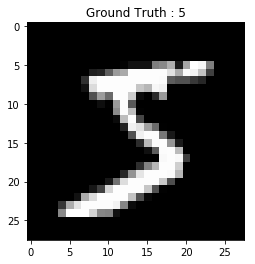

In [3]:
# Load the dataset and plot a sample image from it
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
# display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [4]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [5]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#create and compile the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.2741 - acc: 0.9155 - val_loss: 0.1167 - val_acc: 0.9631
Epoch 2/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0923 - acc: 0.9721 - val_loss: 0.0912 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0576 - acc: 0.9817 - val_loss: 0.1097 - val_acc: 0.9657
Epoch 4/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0397 - acc: 0.9872 - val_loss: 0.0748 - val_acc: 0.9770
Epoch 5/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0282 - acc: 0.9907 - val_loss: 0.0770 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0212 - acc: 0.9930 - val_loss: 0.0659 - val_acc: 0.9823
Epoch 7/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0173 - acc: 0.9945 - val_loss: 0.

In [7]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


10000/10000 [==============================] - 1s 140us/step
Evaluation result on Test Data : Loss = 0.14831019039576818, accuracy = 0.979


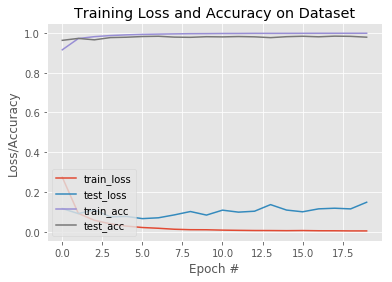

In [10]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

So far we have the model was trained for 20 Epochs witha batch size of 256. The activation function used is Relu and the final layer is Softmax. In the below section we slightly modify the hyper parameters of the model - change the activation, add another dense, increase the batch size and finally evaluate the model accuracy

In [11]:
# But first check the previous model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
#create another model and compile it
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=512, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.3864 - acc: 0.8800 - val_loss: 0.2033 - val_acc: 0.9340
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1300 - acc: 0.9600 - val_loss: 0.0998 - val_acc: 0.9682
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0785 - acc: 0.9753 - val_loss: 0.1001 - val_acc: 0.9698
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0552 - acc: 0.9823 - val_loss: 0.1357 - val_acc: 0.9577
Epoch 5/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0376 - acc: 0.9881 - val_loss: 0.0741 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0716 - val_acc: 0.9787
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0210 - acc: 0.9931 - val_loss: 0.1082 - 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


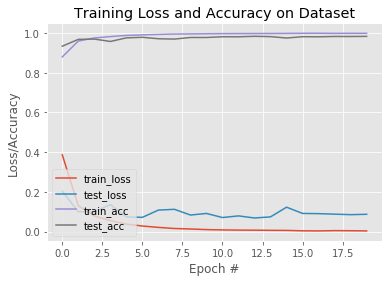

In [14]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [16]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 124us/step
Evaluation result on Test Data : Loss = 0.08696059565994665, accuracy = 0.9833


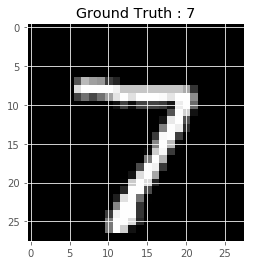

In [15]:
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))
plt.show()

[[4.2259443e-10 3.8060335e-08 7.5764195e-09 7.4969726e-08 2.0498710e-08
  2.8024010e-09 8.0959228e-10 9.9999988e-01 1.8694124e-10 4.8435123e-08]]


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.11111111, 0.        , 0.        ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

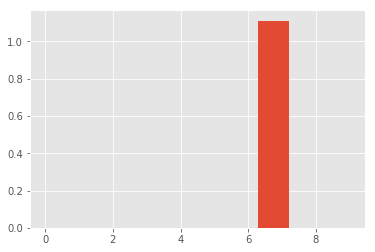

In [40]:
pred = model.predict_classes(test_data[[0],:])
vals=model.predict(test_data[[0],:])
print(vals)
plt.hist(pred, bins=10, density=1, range=[0,9], align='mid')


### Remarks
- Try changing from Tanh to sigmoid
- Try reducing the total params and check the accuracy
- Save the model, load and add another layer 